<a href="https://colab.research.google.com/github/tanyakuznetsova/Music_Mental_Health/blob/main/EDA_Music_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('https://bitbucket.org/silverxlibra/music-mental-health/downloads/mxmh_survey_results.csv')

In [ ]:
data.shape

(736, 33)

In [ ]:
data.head(15)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [ ]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [ ]:
data["Music effects"].unique() #labels

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum() #what has missing values, to decide what to do with

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
data.info

<bound method DataFrame.info of                Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
73

In [ ]:
data.Permissions.unique() #can be dropped, everyone agreed

array(['I understand.'], dtype=object)

Potential questions to find answers to:

* what genre resulted in the most often self-reported mental health improvement? What had a worsening effect, and what had none? (maybe do this in a high level format i.e. a graph / correlation and then perhaps do run a cluster analysis via genre?)

* how do listeners access music, which platforms are most and least used, the breakdown

* what genres are favored across different age groups (e.g 18-35, 35-50, 50+)? Is there a difference between music influence on mental health? There is likely a generational difference between what genres different demographics are preferring and the reported outcomes on their respective mental health?

* what clusters of listeners can be detected? What features are the most telling in clumping them together?

* moar to follow

* Is there a correlation b/w hours listened and mental wellbeing

* do individuals that listen to music while working report more improved mental health than those who don't listen while they work?


# Exploratory Data Analysis and visualizations

###How do listeners access music, what platforms do they use?

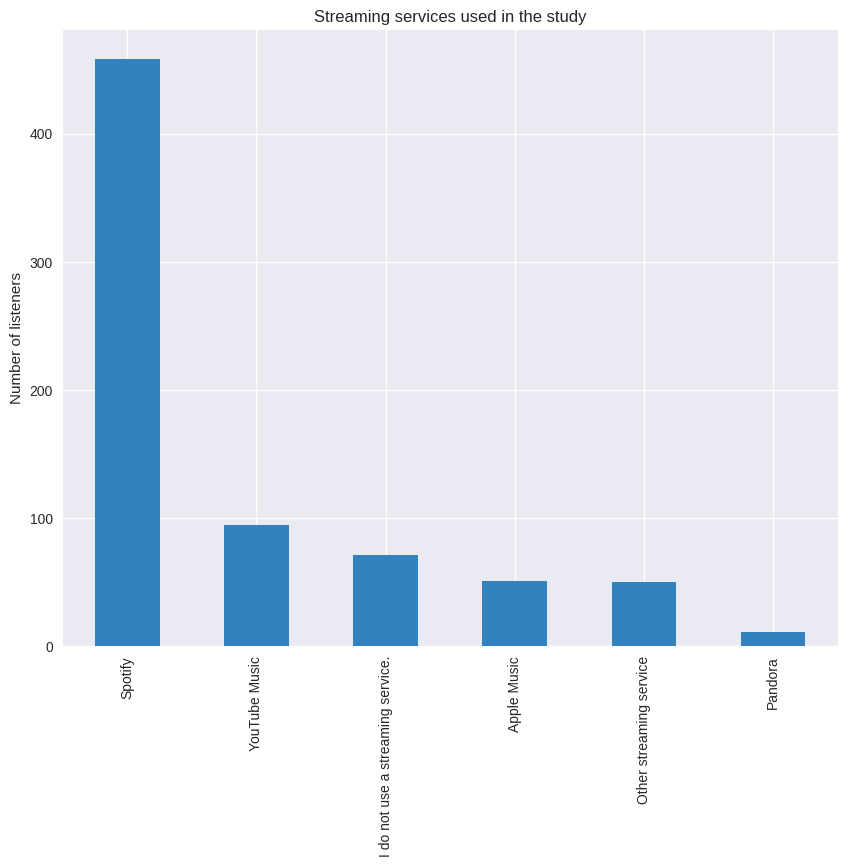

In [ ]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-v0_8')
plt.title('Streaming services used in the study')
plt.ylabel('Number of listeners')

data['Primary streaming service'].value_counts().plot.bar(cmap = 'tab20c')
plt.show()

How much do the participants listen to music while working vs in their spare time?

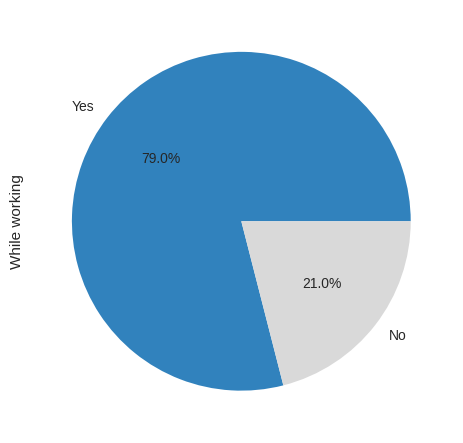

In [ ]:
data['While working'].value_counts().plot.pie(autopct='%1.1f%%',
                                              cmap = 'tab20c'
                                              )
plt.show()

The overwhelming majority of the participants listen to music on Spotify, by far the most popular streaming service in this study, with a few others in the mix. Almost 80% of the participants report listening while working.

### What ages are represented?


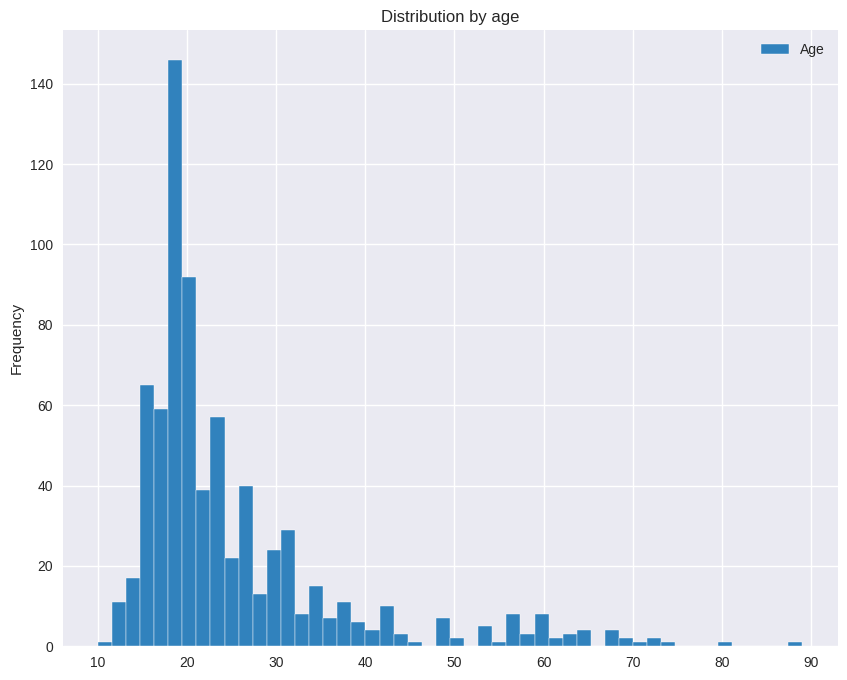

In [ ]:
data.Age.plot.hist(figsize = (10, 8),
                   bins = 50,
                   cmap = 'tab20c',
                   edgecolor = 'white',
                   ylabel = 'Counts',
                   xlabel = 'Ages',
                   title = 'Distribution by age',
                   legend = 'upper right')

plt.show()

In [ ]:
data.Age.mean()

25.206802721088437

In [ ]:
data.Age.mode()

0    18.0
Name: Age, dtype: float64

In [ ]:
data.Age.median()

21.0

The data is right-skewed towards the younger demographic; by far the largest group is 18 to 25, but all age groups are represented.

# Music access preference by age

Does the way the respondents in this study prefer to listen to music vary with age? How do participants in different age groups prefer to access music?


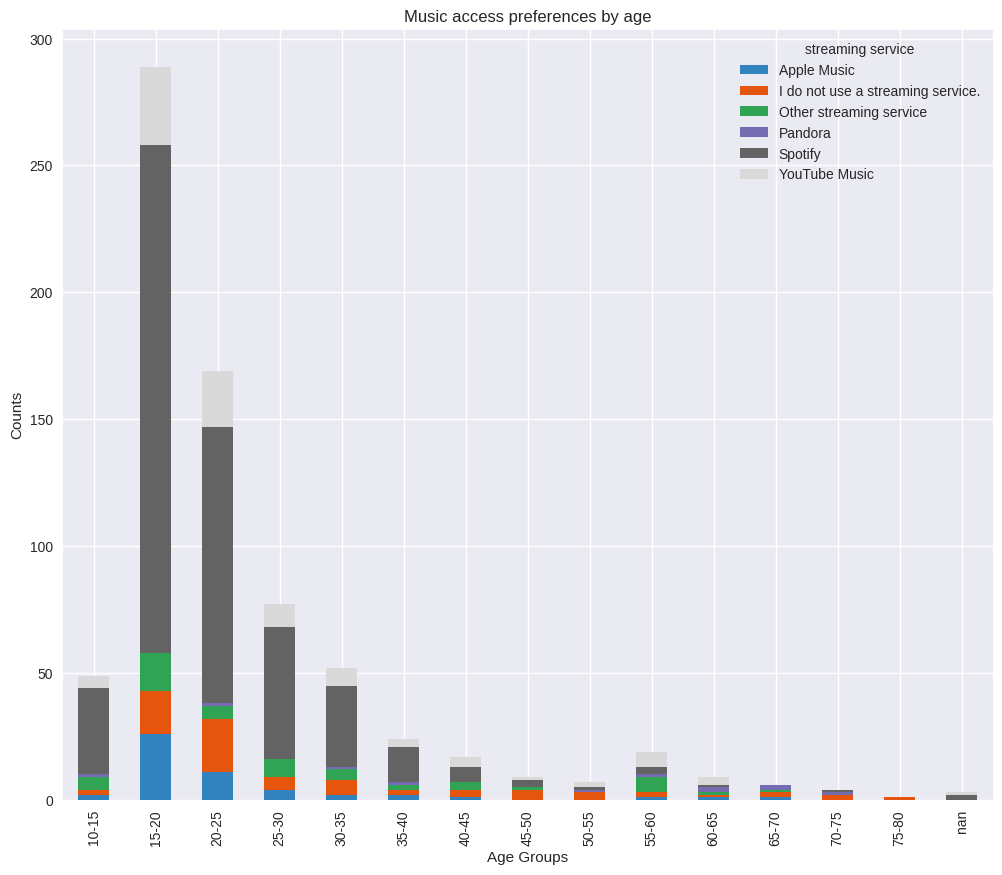

In [ ]:
streaming_service = data['Primary streaming service']

bin_edges = range(10, 90, 5)
age_bins = pd.cut(data['Age'], bins = bin_edges).astype(str)
#cosmetic changes to set xticks:
age_bins = age_bins.str.replace(', ', '-', regex = True).str.replace('(', '', regex = True).str.replace(']', '', regex = True)


df = pd.DataFrame({'streaming service': streaming_service,
                   'ages': age_bins})

pivoted_df = pd.pivot_table(df, index = age_bins,
                            columns = 'streaming service',
                            aggfunc = 'size')
pivoted_df.plot.bar(figsize = (12, 10),
                    cmap = 'tab20c', #not necessarily this color map but the default is not visually appealing
                    stacked = True,
                    title = 'Music access preferences by age',
                    xlabel = 'Age Groups',
                    ylabel = 'Counts',
                    legend = 'upper right')


plt.show()

### What genres do the participants prefer?

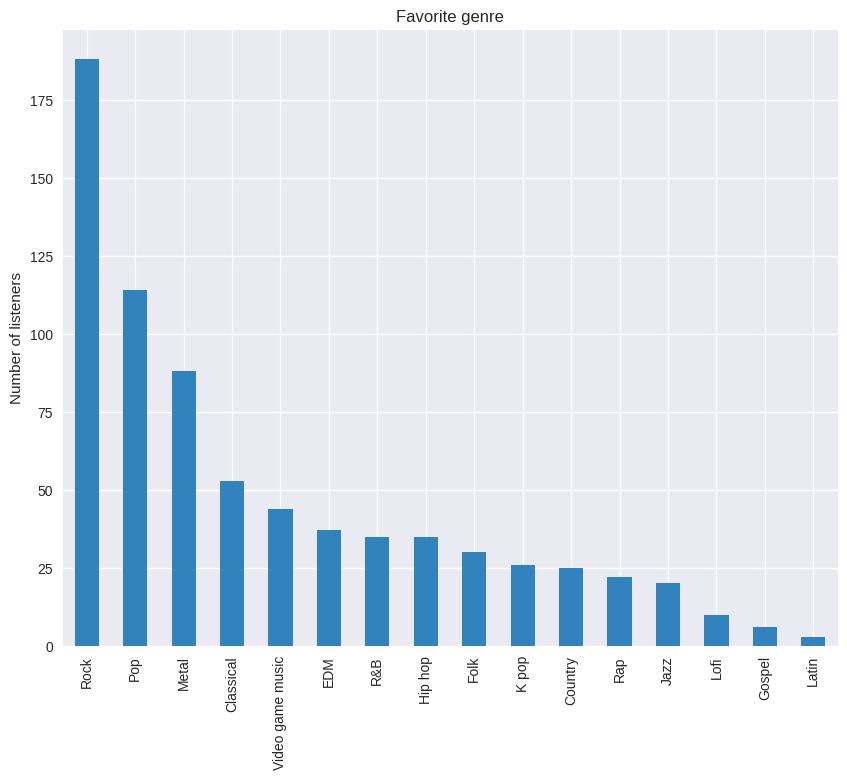

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('Favorite genre')

plt.ylabel('Number of listeners')
data['Fav genre'].value_counts().plot.bar(cmap = 'tab20c')
plt.show()

What is the overall picture with genre preference by age?

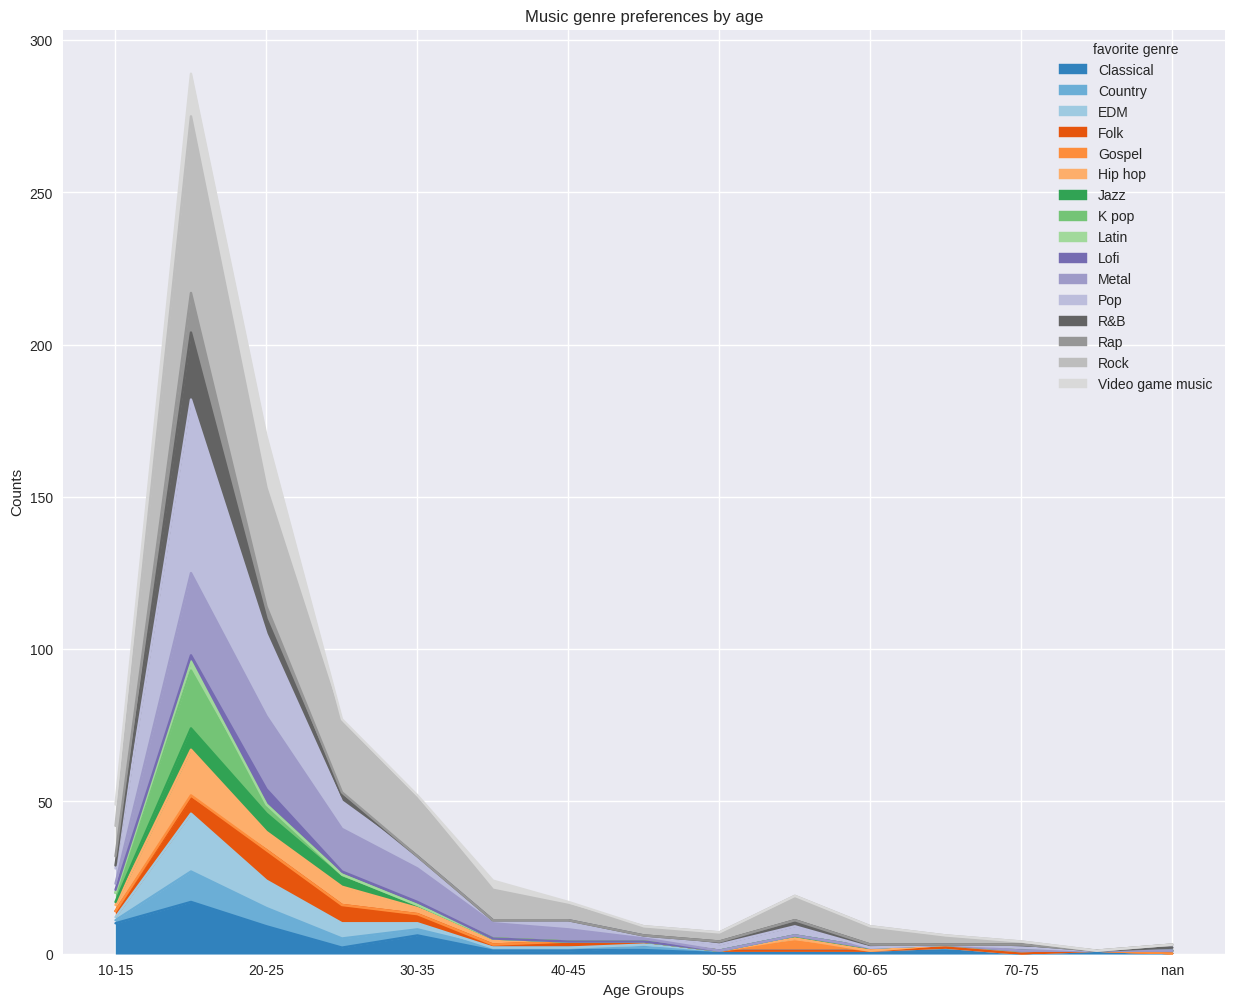

In [ ]:
df1 = pd.DataFrame({'favorite genre': data['Fav genre'],
                   'ages': age_bins})

pivoted_df1 = pd.pivot_table(df1, index = age_bins,
                            columns = 'favorite genre',
                            aggfunc = 'size')#.sort_index(ascending=False)

#alternatively plot.barh() is also an option

pivoted_df1.plot.area(figsize = (15, 12),
                    cmap = 'tab20c', #not necessarily this color map but the default is not visually appealing
                    stacked = True,
                    title = 'Music genre preferences by age',
                    xlabel = 'Age Groups',
                    ylabel = 'Counts',
                    legend = 'lower right')


plt.show()

What is the distribution by the number of hours that the participants report listening to music for?

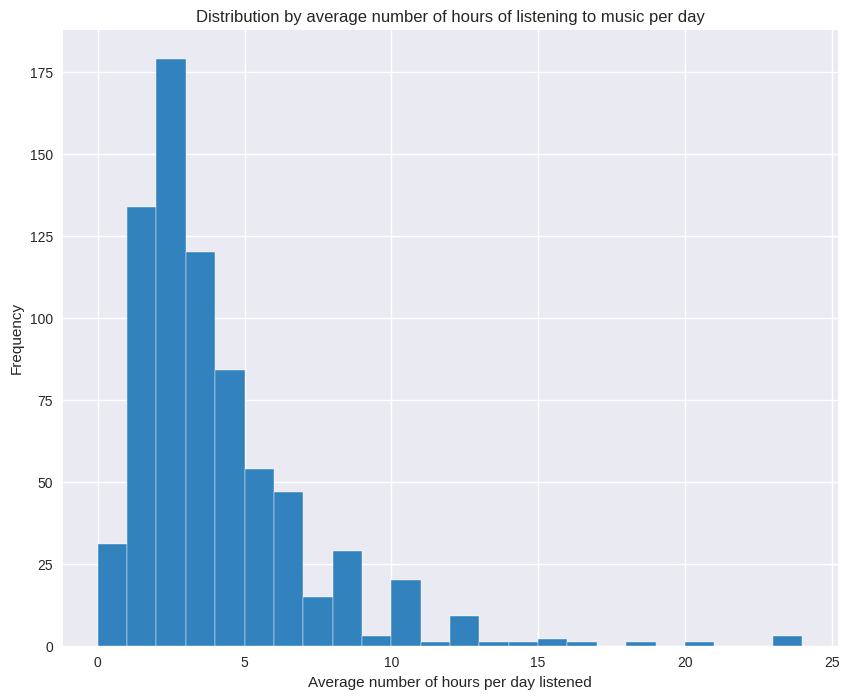

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlabel('Average number of hours per day listened')
plt.ylabel('Number of listeners')
plt.title('Distribution by average number of hours of listening to music per day')

data['Hours per day'].plot.hist(bins = 24,
                                cmap = 'tab20c',
                                edgecolor = 'white')

plt.show()

The majority of the participants listen to music while they work; rock is the most popular genre, followed by pop, metal and classical. Most listeners report listening to music about 3 hours daily.

## Mental Health Conditions

When it comes to the mental health conditions this study is concerned with, ate there observable trends? Do any of these conditions co-occur, is there any correlation? For example, do any of the four mental health conditions - anxiety, depression, insomnia and OCD - go together more often that other combinations?

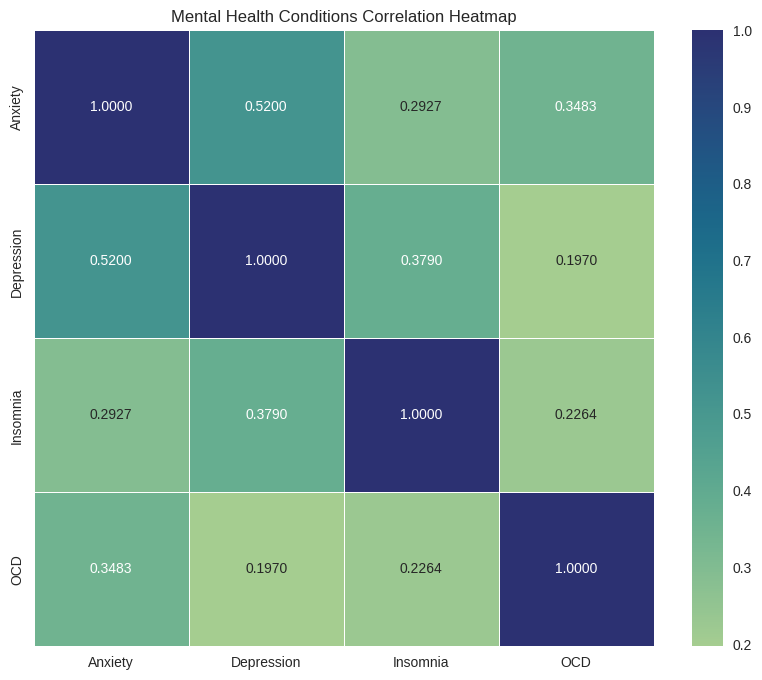

In [ ]:
mh_data = data[['Anxiety', 'Depression', 'Insomnia', 'OCD']]

import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Mental Health Conditions Correlation Heatmap')
sns.heatmap(mh_data.corr(), cmap = 'crest', annot=True, fmt=".4f",  linewidths=0.5)
plt.show()

It appears that the most common and prominent co-occurring pair is *anxiety and depression*.
It is followed by *insomnia and depression* as the second highest correlated pair; the third is *anxiety and OCD*, although the correlation is not as clear and significant in these cases.

What is the spread of the severity of the conditions? They are rated on the scale from 0 to 10. Let's compare them side by side:

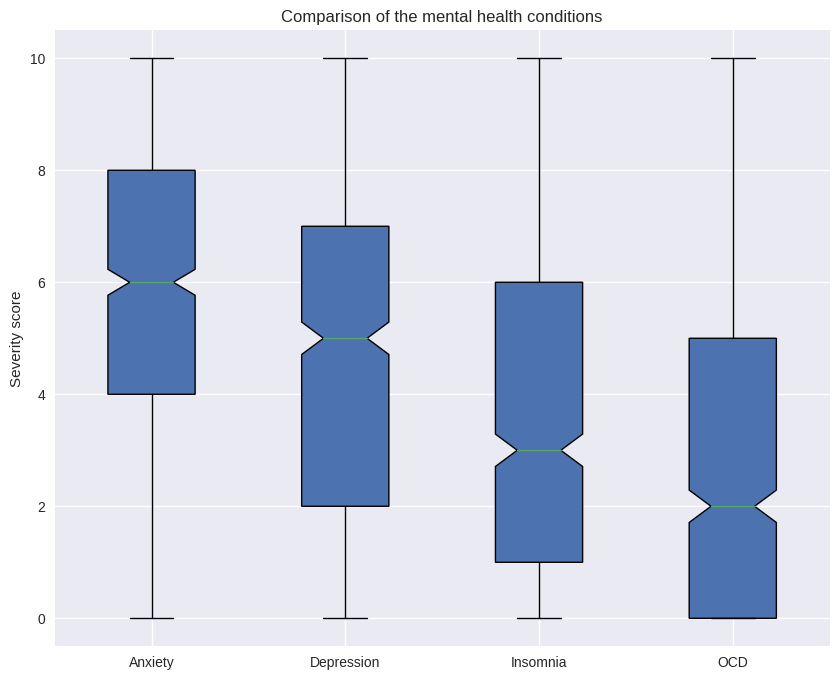

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.boxplot(mh_data, patch_artist = True,
           notch = True,
           labels = mh_data.columns,
           showfliers = True,
           )

ax.set(
    title='Comparison of the mental health conditions',
    #xticklabels = mh_data.columns,
    ylabel='Severity score',
)
plt.show()

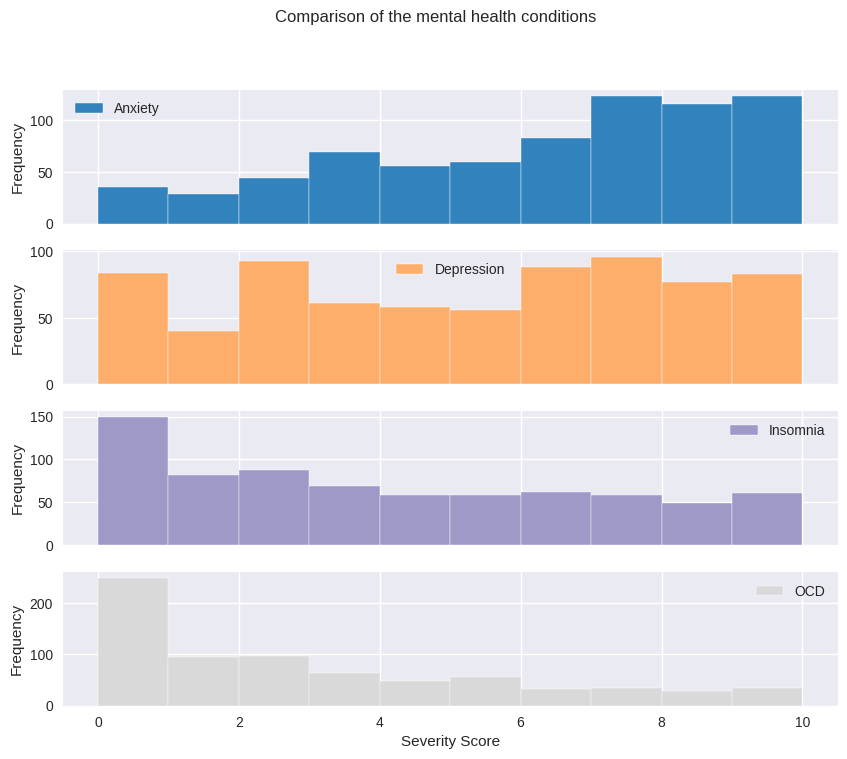

In [ ]:
mh_data.plot.hist(cmap = 'tab20c',
                  edgecolor = 'white',
                  figsize = (10, 8),
                  subplots = True, #comment out to compare with the previous version
                  title = 'Comparison of the mental health conditions ')

plt.xlabel('Severity Score')
#plt.ylabel('Counts')

plt.show()

Finally, let's look at the spread of the outcomes for mental health: did it improve, worsen, or stay the same for the participants of the study?



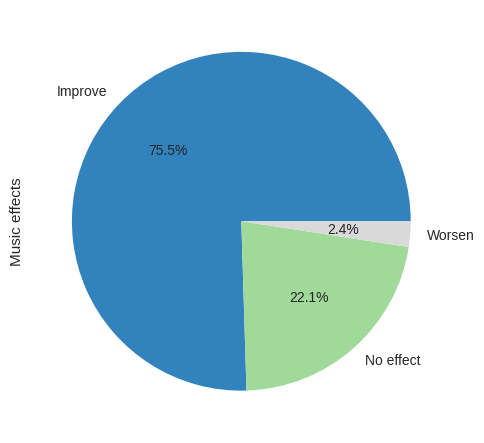

In [ ]:
clean_data['Music effects'].value_counts().plot.pie(autopct='%1.1f%%',
                                              cmap = 'tab20c'
                                              )
plt.show()

Listening to music had a benefical effect on the majority of the participants, three quarters of whom reported an improvement in their mental wellbeing. 22% reported it having no impact and only a small percentage said that it worsened.

We can assume that for the majority of people listening to music - without even opting for specific genres, just listening to what they normally enjoy - is a practice that is positively correlated with mental health benefits and few downsides.